In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


In [3]:
display(df_train.describe())
display(df_test.describe())

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [4]:
display(df_train.head())
display(df_test.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df_train.sample(5).text

812     What if every 5000 wins in ranked play gave yo...
738     @burberryant bleeding on the brain don't know ...
7130    Maailiss: Diaporama : sixpenceee: Karymsky Lak...
5126    Nuclear reactor railguns would be a great way ...
946                   @orbette more like BLOWN UP amirite
Name: text, dtype: object

In [6]:
BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE

EPOCHS = 2
# Start with non-tensorflow approaches
# AUTO = tf.data.experimental.AUTOTUNE 

In [7]:
# Train, test, validation split
X = df_train["text"]
y = df_train["target"]

# If 42 is the answer, then 42*42 is the seed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42*42)

X_test = df_test["text"] # Test data unknown

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Vectorize the training dataset text
# if it's fun to say, you know it's good
# tiffeediff
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2')
X_train_vectorized = vectorizer.fit_transform(df_train['text'])

# Perform PCA analysis
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_vectorized.toarray())

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.00670651 0.00443339 0.00367101 0.00330823]


In [9]:
pca.explained_variance_ratio_.sum()

0.018119141822668976

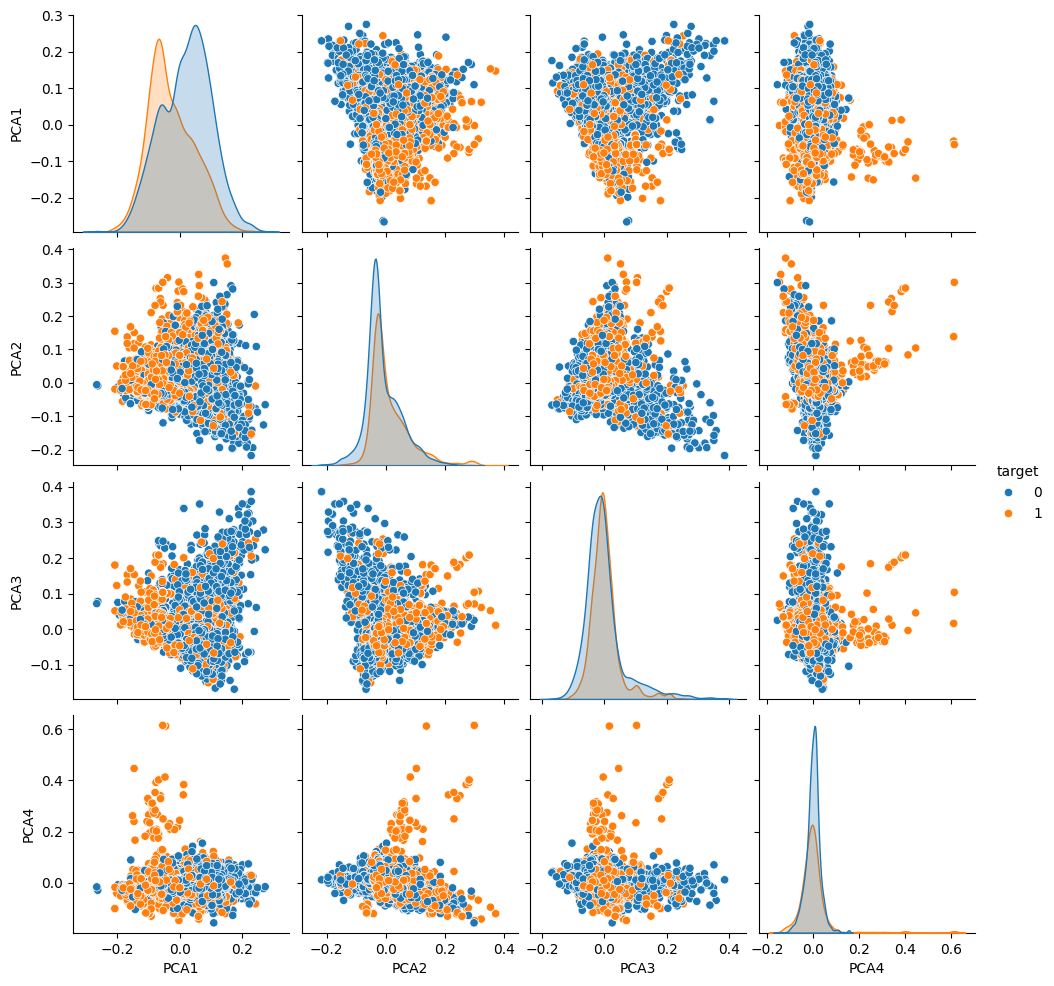

In [10]:
# Plot the PCA components in a seaborn pairplot
import seaborn as sns

# Create a dataframe from the PCA components
df_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
df_pca['target'] = df_train['target']

# Plot the pairplot
sns.pairplot(df_pca, hue='target')

In [11]:
# Find the words that are most correlated with the target variable

# Create a dataframe from the vectorized text
# sample = pd.DataFrame(X_train_vectorized.toarray()).sample(1000)
df_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
# df_vectorized['target'] = df_train['target']

df_vec_sample = df_vectorized.sample(5000)

# Calculate the correlation matrix
# correlation_matrix = df_vec_sample.corr()
correlation_series = df_vec_sample.corrwith(df_train['target'])

In [12]:
# Find the words that are most correlated with the target variable
# correlation_target = correlation_matrix['target']
# correlation_target = correlation_target.drop('target')
# correlation_target = correlation_target.sort_values(ascending=False).iloc[:10]

# # Print the most correlated words
# print(correlation_target)
correlation_series.sort_values(ascending=False).iloc[:25]

http          0.208820
co            0.188372
in            0.152978
california    0.136451
hiroshima     0.125067
suicide       0.122049
killed        0.118770
northern      0.111874
wildfire      0.110958
after         0.106579
fires         0.105677
homes         0.104441
mh370         0.100138
bombing       0.099701
atomic        0.097014
news          0.094006
train         0.091379
families      0.090654
severe        0.090041
latest        0.089551
police        0.088099
bomber        0.085640
warning       0.085236
typhoon       0.084680
outbreak      0.084414
dtype: float64